<a href="https://colab.research.google.com/github/Faith-Mueni/Carbon_Visualization/blob/main/LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib
import plotly.express as px
import json




In [3]:
df=pd.read_csv('/content/Life Expectancy Data.csv')

In [4]:
df.head(5)

,Country,Region,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,Hepatitis_B,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,Afghanistan,Asia,2000,0,55.8,310.8305,90.5,0.02,10.424960,62,...,24.0,8.20,0.338,24,0.02,148,20.78,2.3,2.5,2.2
1,Afghanistan,Asia,2001,0,56.3,304.8580,87.9,0.02,10.574728,63,...,35.0,7.80,0.340,33,0.02,163,21.61,2.1,2.4,2.2
2,Afghanistan,Asia,2002,0,56.8,298.8855,85.3,0.02,16.887351,64,...,36.0,7.76,0.341,36,0.02,320,22.60,19.9,2.2,2.3
3,Afghanistan,Asia,2003,0,57.3,292.0365,82.7,0.02,11.089053,65,...,41.0,8.82,0.373,41,0.02,332,23.68,19.7,19.9,2.4
4,Afghanistan,Asia,2004,0,57.8,285.1880,80.0,0.02,15.296066,67,...,5.0,8.79,0.381,50,0.02,323,24.73,19.5,19.7,2.5


In [5]:
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

<ipython-input-5-59d14d1c8f20>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


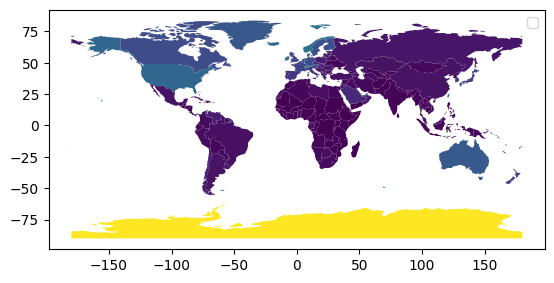

In [6]:
world=world[(world.pop_est>0) & (world.name!='Africa')]
world['GDP_per_capita']=world.gdp_md_est/world.pop_est
world.plot(column='GDP_per_capita')
plt.legend()

Visualization of the Adult mortality in the african continent in the year 2015

In [7]:
Africa=['Kenya','Uganda','Tanzania','Rwanda','Ethiopia','Lesotho','Liberia','Libya','Malawi','Mali','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Senegal','Seychelles','Sierra Leon','Somalia','South Africa','Togo','Tunisa','Zambia','Zimbabwe']
df_africa=df[df['Country'].isin(Africa)].reset_index()

In [8]:
df_africa.head()

,index,Country,Region,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,864,Ethiopia,Africa,2000,0,51.9,387.2035,87.2,0.19,11.594818,...,55.0,4.36,0.000,30,1.20,262,66.22,11.9,11.8,1.5
1,865,Ethiopia,Africa,2001,0,52.6,386.2285,83.8,0.20,1.186228,...,55.0,4.26,0.283,32,1.06,276,68.16,11.8,11.7,1.6
2,866,Ethiopia,Africa,2002,0,53.3,385.2530,80.3,0.16,10.824526,...,55.0,4.73,0.298,35,0.95,272,70.14,11.7,11.6,1.7
3,867,Ethiopia,Africa,2003,0,54.2,369.5585,76.7,0.14,10.972019,...,55.0,4.64,0.306,37,0.83,259,72.17,11.6,11.5,1.7
4,868,Ethiopia,Africa,2004,0,55.2,353.8640,73.1,0.21,1.506962,...,54.0,4.23,0.310,40,0.73,286,74.24,11.5,11.3,1.8


In [11]:
df_africa_2015 = df_africa[df_africa['Year'] == 2015].sort_values(by='Adult_mortality',ascending=False)

In [12]:
df_africa_2015

,index,Country,Region,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
47,1471,Lesotho,Africa,2015,0,51.0,513.4755,72.6,3.07,0.000000,...,9.0,0.00,0.495,93,10.00,1146,2.06,5.5,5.3,6.1
367,2847,Zimbabwe,Africa,2015,0,59.5,368.1410,42.1,3.84,0.000000,...,88.0,0.00,0.507,87,3.86,1445,13.81,5.6,5.5,8.2
207,1903,Nigeria,Africa,2015,0,53.1,356.2145,79.3,4.51,0.000000,...,49.0,0.00,0.525,49,0.58,2687,181.14,9.8,9.7,6.0
287,2351,South Africa,Africa,2015,0,62.6,351.3925,28.6,7.20,0.000000,...,75.0,0.00,0.665,75,6.91,6260,55.39,4.4,5.3,10.1
159,1775,Mozambique,Africa,2015,0,57.2,332.5830,61.3,1.22,0.000000,...,8.0,0.00,0.414,80,3.50,590,27.04,3.6,3.5,3.5
175,1807,Namibia,Africa,2015,0,62.1,315.4730,33.3,2.63,0.000000,...,92.0,0.00,0.637,92,4.58,4897,2.31,8.2,8.1,6.7
335,2655,Uganda,Africa,2015,0,61.4,311.7215,38.9,7.44,14.167702,...,82.0,7.22,0.483,78,2.08,847,38.23,5.6,5.6,5.7
271,2335,Somalia,Africa,2015,0,55.9,308.3030,83.6,0.00,0.000000,...,0.0,0.00,0.000,42,0.13,386,13.80,6.6,6.4,2.1
351,2831,Zambia,Africa,2015,0,61.7,302.8220,46.9,3.50,0.000000,...,9.0,0.00,0.576,90,4.48,1338,15.88,6.3,6.1,6.9
95,1567,Malawi,Africa,2015,0,62.0,294.8580,36.7,2.04,0.000000,...,88.0,0.00,0.473,88,2.59,381,16.75,6.4,6.2,4.4


In [13]:
top_10_countries = df_africa_2015.head(10)

<ipython-input-14-094892860d85>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10_countries.groupby(['Country']).sum().plot(kind='pie',y='Adult_mortality',autopct='%1.0f%%',title='Adult mortality in the top 10 african countries in the year 2015',pctdistance=0.7)


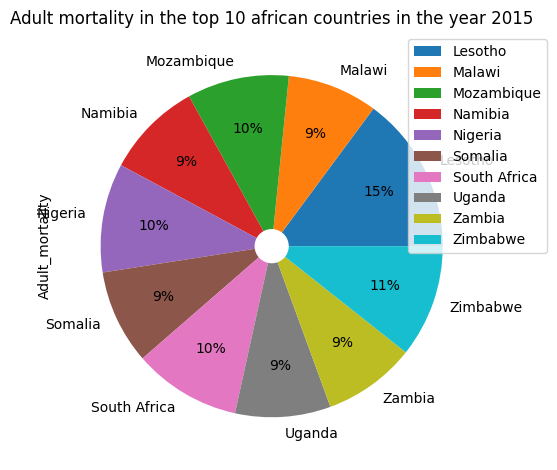

In [14]:
top_10_countries.groupby(['Country']).sum().plot(kind='pie',y='Adult_mortality',autopct='%1.0f%%',title='Adult mortality in the top 10 african countries in the year 2015',pctdistance=0.7)
plt.legend(bbox_to_anchor=(1.16, 1.0), loc="upper right")

centre_circle = plt.Circle((0,0),0.1,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

plt.savefig('Adult mortality in the top 10 african countries in the year 2015.png')

plt.show()



life expectancy in Ireland, Bahrain, Oman, Turkiye over the years



In [10]:
df_countries = df[df['Country'].isin(['Ireland', 'Bahrain', 'Oman', 'Turkiye','Albania','Serbia','Barbados','China','Germany','Japan'])].reset_index()
df_countries.head()



,index,Country,Region,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,16,Albania,Rest of Europe,2000,0,74.0,94.6955,24.1,3.92,91.711541,...,97.0,6.26,0.656,97,0.01,1961,3.09,2.1,2.2,8.8
1,17,Albania,Rest of Europe,2001,0,74.3,90.9390,22.9,4.51,96.205571,...,97.0,6.00,0.662,97,0.01,2144,3.06,2.1,2.1,8.7
2,18,Albania,Rest of Europe,2002,0,74.6,87.1820,21.7,3.96,104.516916,...,98.0,6.30,0.670,98,0.02,2247,3.05,2.0,2.1,9.0
3,19,Albania,Rest of Europe,2003,0,74.8,86.2855,20.4,4.33,14.719289,...,97.0,6.27,0.674,97,0.02,2381,3.04,1.9,2.0,9.0
4,20,Albania,Rest of Europe,2004,0,75.0,85.3885,19.1,4.42,221.842800,...,98.0,6.38,0.681,97,0.02,2522,3.03,1.8,1.9,9.1


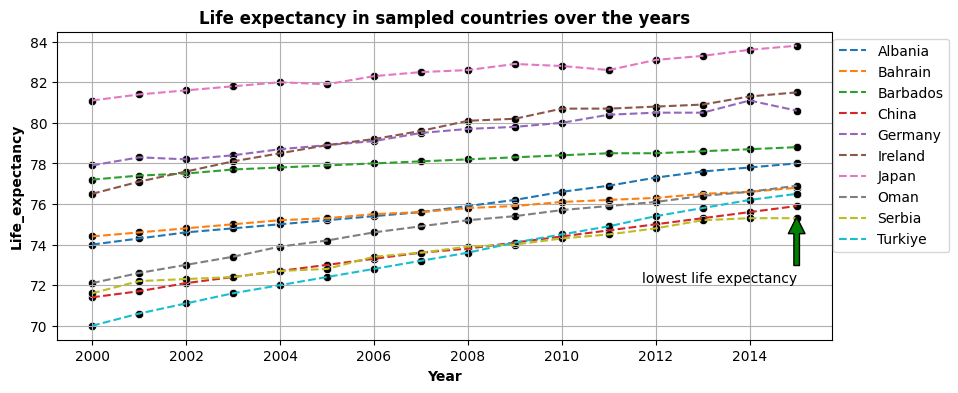

In [11]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Year', y='Life_expectancy', data=df_countries,hue='Country',linestyle='--')
#plt.stackplot(x='Year', y='Life_expectancy', data=df_countries)

sns.scatterplot(x='Year', y='Life_expectancy', data=df_countries, color='black')

plt.title("Life expectancy in sampled countries over the years",weight='bold')
plt.xlabel('Year',weight='bold')
plt.ylabel('Life_expectancy',weight='bold')
plt.grid(visible=True)
plt.legend(bbox_to_anchor=(1.16, 1.0), loc="upper right")

plt.annotate(
    'lowest life expectancy',
    xy=(2015, 75.5),
    horizontalalignment='right',
    verticalalignment='bottom',
    arrowprops={'facecolor':'green','shrink':0.05},
    xytext=(2015,72)
)

plt.savefig('Life expectancy in sampled countries over the years.png')

plt.show()


Distribution of polio rates in the regions.

In [12]:
polio_2015 = df[df['Year'] == 2015].reset_index()
polio_2015.head(10)



,index,Country,Region,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,15,Afghanistan,Asia,2015,0,63.4,227.7350,53.2,0.00,71.279624,...,6.0,8.16,0.479,65,0.03,556,34.41,17.2,17.3,3.6
1,31,Albania,Rest of Europe,2015,0,78.0,75.2050,8.5,4.33,364.975229,...,99.0,6.00,0.762,99,0.03,3953,2.88,1.2,1.3,9.7
2,47,Algeria,Africa,2015,0,76.1,95.8155,21.6,0.55,0.000000,...,95.0,0.00,0.743,95,0.05,4178,39.73,6.0,5.8,7.9
3,63,Angola,Africa,2015,0,59.4,242.9655,57.7,6.53,0.000000,...,7.0,0.00,0.531,64,0.89,3128,27.88,8.3,8.2,5.0
4,79,Antigua and Barbuda,Central America and Caribbean,2015,0,76.5,130.0025,6.5,9.06,0.000000,...,86.0,0.00,0.784,99,0.20,14285,0.09,3.3,3.3,9.2
5,95,Argentina,South America,2015,0,76.1,117.1895,10.2,8.49,0.000000,...,93.0,0.00,0.826,94,0.13,13789,43.13,1.0,0.9,9.8
6,111,Armenia,Rest of Europe,2015,0,74.5,125.4875,12.6,4.04,0.000000,...,96.0,0.00,0.741,94,0.09,3607,2.93,2.1,2.2,11.6
7,127,Australia,Oceania,2015,1,82.4,61.7325,3.3,9.68,0.000000,...,93.0,0.00,0.937,93,0.04,56707,23.82,0.6,0.6,12.8
8,143,Austria,European Union,2015,1,81.2,64.6875,3.0,11.60,0.000000,...,93.0,0.00,0.892,93,0.08,44196,8.64,1.9,2.1,12.1
9,159,Azerbaijan,Asia,2015,0,72.3,124.8970,23.3,0.51,0.000000,...,98.0,0.00,0.758,96,0.05,5500,9.65,2.8,2.9,10.7


In [13]:
polio_2015_grouped = polio_2015.groupby('Region')['Polio'].sum().reset_index()
polio_2015_grouped = polio_2015_grouped.sort_values(by='Polio', ascending=False)

polio_2015_grouped.head(9)


,Region,Polio
0,Africa,3549.0
3,European Union,2576.0
1,Asia,2295.0
2,Central America and Caribbean,1449.0
7,Rest of Europe,1352.0
4,Middle East,1186.0
8,South America,1065.0
6,Oceania,745.0
5,North America,263.0


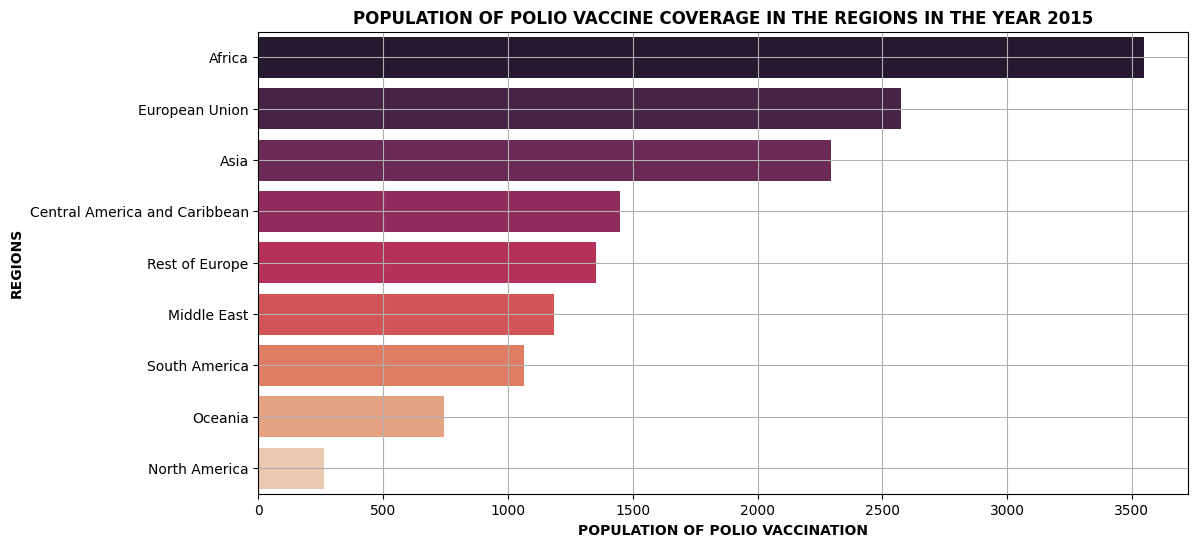

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x='Polio', y='Region',hue='Region',data=polio_2015_grouped, palette='rocket')
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

plt.title('POPULATION OF POLIO VACCINE COVERAGE IN THE REGIONS IN THE YEAR 2015',weight='bold')
plt.xlabel('POPULATION OF POLIO VACCINATION',weight='bold')
plt.ylabel('REGIONS',weight='bold')
plt.grid(visible=True)

plt.savefig('POPULATION OF POLIO VACCINE COVERAGE IN THE REGIONS IN THE YEAR 2015.png')




In [15]:
fig = px.choropleth(polio_2015_grouped,
                    locations="Region",
                    locationmode='country names',
                    color="Polio",
                    hover_name="Region",
                    title="Polio Vaccination Coverage (2015)",
                    color_continuous_scale=px.colors.sequential.Plasma)

plt.savefig('Polio Vaccination Coverage (2015).png')
fig.show()


<Figure size 640x480 with 0 Axes>

Correlation Between GDP per Capita and Life Expectancy in Africa:A scatter *plot*

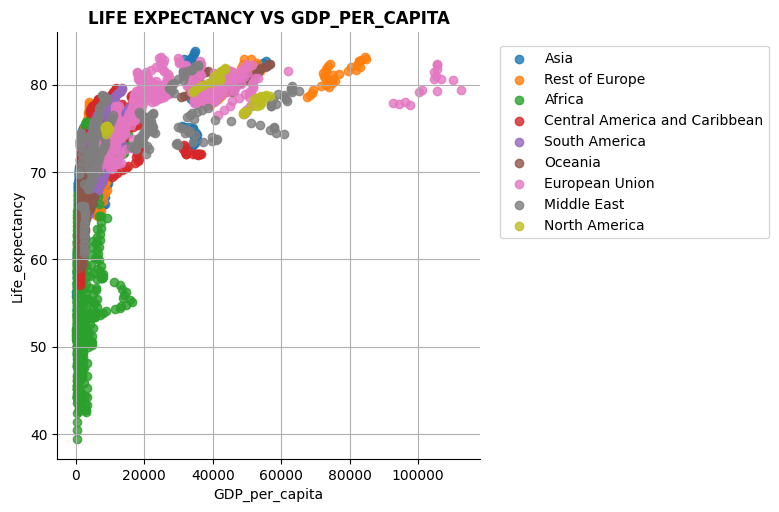

In [16]:
plt.rcParams['figure.figsize'] = [12, 6]


sns.lmplot( x="GDP_per_capita", y="Life_expectancy", data=df, fit_reg=False, hue='Region', legend=False)
plt.legend(bbox_to_anchor=(1.7, 0.5), loc="lower right")

plt.title('LIFE EXPECTANCY VS GDP_PER_CAPITA', weight='bold')
plt.grid()

plt.savefig('LIFE EXPECTANCY VS GDP_PER_CAPITA.png')
plt.show()

Distribution of Schooling Across Regions: A box plot


<ipython-input-17-720f1f66071c>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




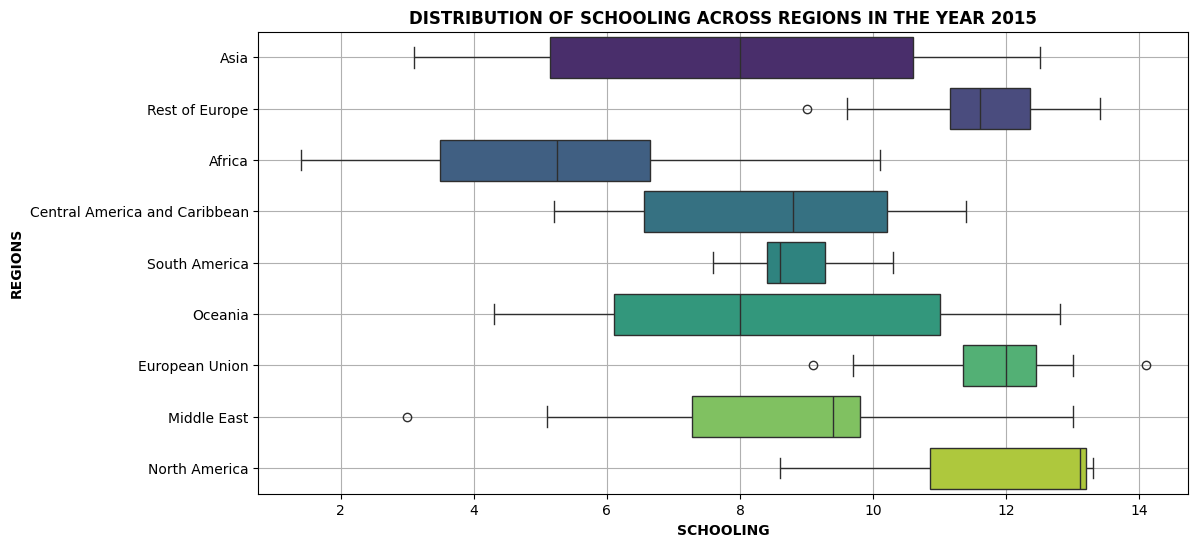

In [17]:
schooling_2015 = df[df['Year'] == 2015].reset_index()
schooling_2015_grouped = schooling_2015.groupby('Region')['Schooling'].sum().reset_index()
schooling_2015_grouped = schooling_2015_grouped.sort_values(by='Schooling', ascending=False)
schooling_2015_grouped.head(9)

plt.figure(figsize=(12,6))
sns.boxplot(y='Region', x='Schooling', data=schooling_2015, palette='viridis')
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

plt.title('DISTRIBUTION OF SCHOOLING ACROSS REGIONS IN THE YEAR 2015',weight='bold')
plt.ylabel('REGIONS',weight='bold')
plt.xlabel('SCHOOLING',weight='bold')
plt.grid(visible=True)

plt.savefig('DISTRIBUTION OF SCHOOLING ACROSS REGIONS IN THE YEAR 2015.png')
plt.show()
